In [2]:
cd /content/hypothesis_Assign_G4

/content/hypothesis_Assign_G4


In [3]:
%pwd

'/content/hypothesis_Assign_G4'

In [4]:
!git clone https://github.com/prasngit5/hypothesis_Assign_G4.git

Cloning into 'hypothesis_Assign_G4'...


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
uc1= [ "Bell","Bexar","Brazoria","Brazos","Cameron","Chambers","Collin","Comal","Dallas","Denton","El Paso","Fort Bend","Galveston","Grayson","Harris","Hays","Hidalgo","Jefferson","Johnson",
      "Kaufman","Lubbock","McLennan","Midland","Nueces","Potter","Randall","Rockwall","San Patricio","Smith","Tarrant","Travis","Webb","Williamson","Wise"]

In [68]:
Urban_counties = [ "Bell County","Bexar County","Brazoria County","Brazos County","Cameron County","Chambers County","Collin County",
                  "Comal County","Dallas County","Denton County","El Paso County","Fort Bend County","Galveston County","Grayson County","Harris County","Hays County","Hidalgo County","Jefferson County","Johnson County",
                  "Kaufman County","Lubbock County","McLennan County","Midland County","Nueces County","Potter County",
                  "Randall County","Rockwall County","San Patricio County","Smith County","Tarrant County","Travis County","Webb County","Williamson County","Wise County"]

In [69]:
#print(uc1==Urban_counties)

In [70]:
import requests
response = requests.get("https://en.wikipedia.org/wiki/List_of_counties_in_Texas")
#cl= ['Smith County','Orange County','Nueces County','Young County','Shelby County','Irion County','Navarro County','Galveston County','Harris County','Parker County']
#ncl = ['Smith','Orange','Nueces','Young','Shelby','Irion','Navarro','Galveston','Harris','Parker']
d = pd.read_html(response.text)
d = d[1]
d.columns=['County Name','fips','cs','est','o','e','Population','a','m']
d = d[['County Name','Population']]
df = d.set_index('County Name')
#ud = df.loc[Urban_counties]
#ud['County Name'] = uc1
##ud['County'] = uc1
##ud = ud.set_index('County')
##ud
#c_pop = d.loc[cl]
#c_pop['Population'][0]
#c_pop = ud
#c_pop
df

,Population
County Name,
Anderson County,57922
Andrews County,18610
Angelina County,86395
Aransas County,23830
Archer County,8560
...,...
Wood County,44843
Yoakum County,7694
Young County,17867


In [71]:
df_to_list = df.index.values.tolist() #changes county column to a list
print("totla list",len(df_to_list),df_to_list)
set(Urban_counties).issubset(df_to_list) #checks to confirm that new_urbna is a subset of the county column
(list(set(df_to_list).difference(Urban_counties))) #get the difference between them to get rural counties
rural_list = set(df_to_list).difference(Urban_counties)
print("rural_list",len(rural_list),rural_list)
print("Urban_counties",len(Urban_counties),Urban_counties)


y = ~df.index.isin([ "Bell County","Bexar County","Brazoria County","Brazos County","Cameron County","Chambers County","Collin County",
                  "Comal County","Dallas County","Denton County","El Paso County","Fort Bend County","Galveston County","Grayson County","Harris County","Hays County","Hidalgo County","Jefferson County","Johnson County",
                  "Kaufman County","Lubbock County","McLennan County","Midland County","Nueces County","Potter County",
                  "Randall County","Rockwall County","San Patricio County","Smith County","Tarrant County","Travis County","Webb County","Williamson County","Wise County"])
rrll = df.loc[y].index.values.tolist()
print('rrll',len(rrll),rrll)


totla list 254 ['Anderson County', 'Andrews County', 'Angelina County', 'Aransas County', 'Archer County', 'Armstrong County', 'Atascosa County', 'Austin County', 'Bailey County', 'Bandera County', 'Bastrop County', 'Baylor County', 'Bee County', 'Bell County', 'Bexar County', 'Blanco County', 'Borden County', 'Bosque County', 'Bowie County', 'Brazoria County', 'Brazos County', 'Brewster County', 'Briscoe County', 'Brooks County', 'Brown County', 'Burleson County', 'Burnet County', 'Caldwell County', 'Calhoun County', 'Callahan County', 'Cameron County', 'Camp County', 'Carson County', 'Cass County', 'Castro County', 'Chambers County', 'Cherokee County', 'Childress County', 'Clay County', 'Cochran County', 'Coke County', 'Coleman County', 'Collin County', 'Collingsworth County', 'Colorado County', 'Comal County', 'Comanche County', 'Concho County', 'Cooke County', 'Coryell County', 'Cottle County', 'Crane County', 'Crockett County', 'Crosby County', 'Culberson County', 'Dallam County',

In [72]:
#y = ~df.index.isin([])
rdd = df.loc[rrll]
rdd

,Population
County Name,
Anderson County,57922
Andrews County,18610
Angelina County,86395
Aransas County,23830
Archer County,8560
...,...
Wood County,44843
Yoakum County,7694
Young County,17867


URBAN

In [73]:
udd = df.loc[Urban_counties]
udd

,Population
County Name,
Bell County,370647
Bexar County,2009324
Brazoria County,372031
Brazos County,233849
Cameron County,421017
Chambers County,46571
Collin County,1064465
Comal County,161501
Dallas County,2613539


In [74]:
new_urban_list = [s.replace("County", "") for s in udd.index.values.tolist()]
new_urban_list.sort()
udd['County'] = new_urban_list
udd.set_index('County',inplace=True)
udd

,Population
County,
Bell,370647
Bexar,2009324
Brazoria,372031
Brazos,233849
Cameron,421017
Chambers,46571
Collin,1064465
Comal,161501
Dallas,2613539


RURAL

In [75]:
new_rural_list = [s.replace("County", "") for s in rdd.index.values.tolist()]
new_rural_list.sort()
n_rc = [x.strip(' ') for x in new_rural_list]
rdd['County'] = n_rc
rdd.set_index('County',inplace=True)
rdd.index
rdd

,Population
County,
Anderson,57922
Andrews,18610
Angelina,86395
Aransas,23830
Archer,8560
...,...
Wood,44843
Yoakum,7694
Young,17867


In [76]:
per_c = 100000 # as per requirement from the questionaire(need percapita  per 100K population)

def per_capita(r,n):
  s = (float(r)/float(n))*per_c
  return s

In [77]:
url1 = "https://www.dshs.texas.gov/coronavirus/TexasCOVID19CaseCountData.xlsx"
dA = pd.read_excel(url1, sheet_name = 'Case and Fatalities',skiprows=1)
dA=dA.truncate(before=0,after=253)  # There are extra rows in the file, just remove, should look for last county, but this is easier
dA

,County,Confirmed Cases,Probable Cases,Fatalities
0,Anderson,5005.0,2841.0,184
1,Andrews,2688.0,0.0,52
2,Angelina,6627.0,6805.0,371
3,Aransas,1955.0,580.0,59
4,Archer,968.0,143.0,15
...,...,...,...,...
249,Wood,3415.0,2842.0,198
250,Yoakum,1157.0,0.0,30
251,Young,2378.0,323.0,60
252,Zapata,1668.0,505.0,43


In [78]:
dA.keys()

Index(['County', 'Confirmed Cases', 'Probable Cases', 'Fatalities'], dtype='object')

In [79]:
dA = dA.set_index('County')


URBAN

In [80]:
n_uc = [s.replace("County", "") for s in udd.index.values.tolist()]
n_uc.sort()
udf = dA.loc[uc1]
udf['County'] = n_uc
udf.set_index('County',inplace=True)
udf

,Confirmed Cases,Probable Cases,Fatalities
County,,,
Bell,32419.0,4738.0,652
Bexar,257402.0,53931.0,4793
Brazoria,45644.0,11877.0,771
Brazos,31968.0,5308.0,331
Cameron,52353.0,11729.0,1733
Chambers,8604.0,0.0,51
Collin,102184.0,23123.0,1042
Comal,10752.0,7962.0,427
Dallas,331812.0,58297.0,4955


In [81]:
for i in udf.index:
  #print(uc.loc[i])
  udf.loc[i] = udf.loc[i].apply(per_capita,args=(udd['Population'][i],))
  
udf

,Confirmed Cases,Probable Cases,Fatalities
County,,,
Bell,8746.597167,1278.305234,175.908614
Bexar,12810.378018,2684.037019,238.537936
Brazoria,12268.870067,3192.475896,207.240794
Brazos,13670.359933,2269.840795,141.544330
Cameron,12434.889803,2785.873255,411.622334
Chambers,18475.016641,0.000000,109.510210
Collin,9599.564100,2172.264941,97.889550
Comal,6657.543916,4930.000433,264.394648
Dallas,12695.888602,2230.577007,189.589671


RURAL COUNTY

In [82]:
#n_rc = [s.replace("County", "") for s in rd.index.values.tolist()]
n_rc= rdd.index.values.tolist()
n_rc = [x.strip(' ') for x in n_rc]
print(n_rc)
rdf = dA.loc[n_rc]
rdf['County'] = n_rc
rdf.set_index('County',inplace=True)
rdf
#print(rdf.index.values.tolist())

['Anderson', 'Andrews', 'Angelina', 'Aransas', 'Archer', 'Armstrong', 'Atascosa', 'Austin', 'Bailey', 'Bandera', 'Bastrop', 'Baylor', 'Bee', 'Blanco', 'Borden', 'Bosque', 'Bowie', 'Brewster', 'Briscoe', 'Brooks', 'Brown', 'Burleson', 'Burnet', 'Caldwell', 'Calhoun', 'Callahan', 'Camp', 'Carson', 'Cass', 'Castro', 'Cherokee', 'Childress', 'Clay', 'Cochran', 'Coke', 'Coleman', 'Collingsworth', 'Colorado', 'Comanche', 'Concho', 'Cooke', 'Coryell', 'Cottle', 'Crane', 'Crockett', 'Crosby', 'Culberson', 'Dallam', 'Dawson', 'DeWitt', 'Deaf Smith', 'Delta', 'Dickens', 'Dimmit', 'Donley', 'Duval', 'Eastland', 'Ector', 'Edwards', 'Ellis', 'Erath', 'Falls', 'Fannin', 'Fayette', 'Fisher', 'Floyd', 'Foard', 'Franklin', 'Freestone', 'Frio', 'Gaines', 'Garza', 'Gillespie', 'Glasscock', 'Goliad', 'Gonzales', 'Gray', 'Gregg', 'Grimes', 'Guadalupe', 'Hale', 'Hall', 'Hamilton', 'Hansford', 'Hardeman', 'Hardin', 'Harrison', 'Hartley', 'Haskell', 'Hemphill', 'Henderson', 'Hill', 'Hockley', 'Hood', 'Hopkins

,Confirmed Cases,Probable Cases,Fatalities
County,,,
Anderson,5005.0,2841.0,184
Andrews,2688.0,0.0,52
Angelina,6627.0,6805.0,371
Aransas,1955.0,580.0,59
Archer,968.0,143.0,15
...,...,...,...
Wood,3415.0,2842.0,198
Yoakum,1157.0,0.0,30
Young,2378.0,323.0,60


In [83]:
#print('r',rd.index)
#print('rdf1',rdf.index)
er = [x.strip(' ') for x in rdd.index]
#print(er)
rdd['County'] = er
rdf['County'] = er
print('rdf',rdf.index)
print('rd',rdd.index)
#print(rdf.index == rdd.index)

rdf Index(['Anderson', 'Andrews', 'Angelina', 'Aransas', 'Archer', 'Armstrong',
       'Atascosa', 'Austin', 'Bailey', 'Bandera',
       ...
       'Wichita', 'Wilbarger', 'Willacy', 'Wilson', 'Winkler', 'Wood',
       'Yoakum', 'Young', 'Zapata', 'Zavala'],
      dtype='object', name='County', length=220)
rd Index(['Anderson', 'Andrews', 'Angelina', 'Aransas', 'Archer', 'Armstrong',
       'Atascosa', 'Austin', 'Bailey', 'Bandera',
       ...
       'Wichita', 'Wilbarger', 'Willacy', 'Wilson', 'Winkler', 'Wood',
       'Yoakum', 'Young', 'Zapata', 'Zavala'],
      dtype='object', name='County', length=220)


In [84]:
rdd.drop(labels=None, axis=0, index=None, columns=['County'], inplace=True)
rdd

,Population
County,
Anderson,57922
Andrews,18610
Angelina,86395
Aransas,23830
Archer,8560
...,...
Wood,44843
Yoakum,7694
Young,17867


In [85]:
rdf.drop(labels=None, axis=0, index=None, columns=['County'], inplace=True)
rdf

,Confirmed Cases,Probable Cases,Fatalities
County,,,
Anderson,5005.0,2841.0,184
Andrews,2688.0,0.0,52
Angelina,6627.0,6805.0,371
Aransas,1955.0,580.0,59
Archer,968.0,143.0,15
...,...,...,...
Wood,3415.0,2842.0,198
Yoakum,1157.0,0.0,30
Young,2378.0,323.0,60


In [86]:
for i in rdf.index:
  #

  #print(rdd['Population'][i])
  rdf.loc[i] = rdf.loc[i].apply(per_capita,args=((rdd['Population'][i]),))
  
rdf

,Confirmed Cases,Probable Cases,Fatalities
County,,,
Anderson,8640.930907,4904.872069,317.668589
Andrews,14443.847394,0.000000,279.419667
Angelina,7670.582788,7876.613230,429.422999
Aransas,8203.944608,2433.906840,247.587075
Archer,11308.411215,1670.560748,175.233645
...,...,...,...
Wood,7615.458377,6337.666971,441.540486
Yoakum,15037.691708,0.000000,389.914219
Young,13309.453182,1807.802093,335.814630


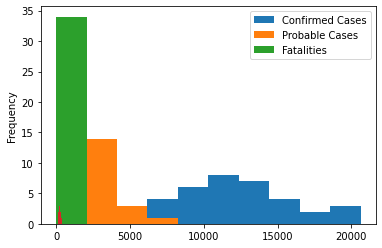

In [87]:
udf.plot(kind='hist')
udf['Fatalities'].plot(kind='hist')


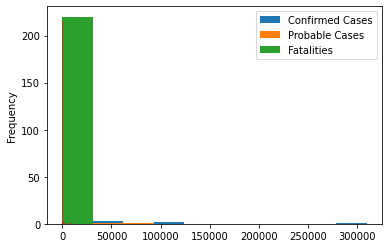

In [88]:
rdf.plot(kind='hist')
rdf['Fatalities'].plot(kind='hist')

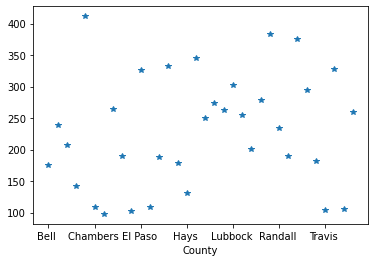

In [89]:
udf['Fatalities'].plot(style='*')

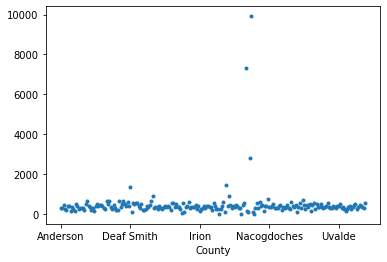

In [90]:
rdf['Fatalities'].plot(style=".")

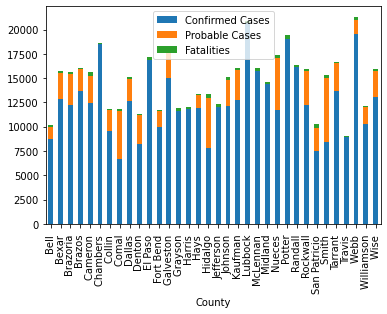

In [91]:
udf.plot.bar(stacked=True)

No handles with labels found to put in legend.


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219]


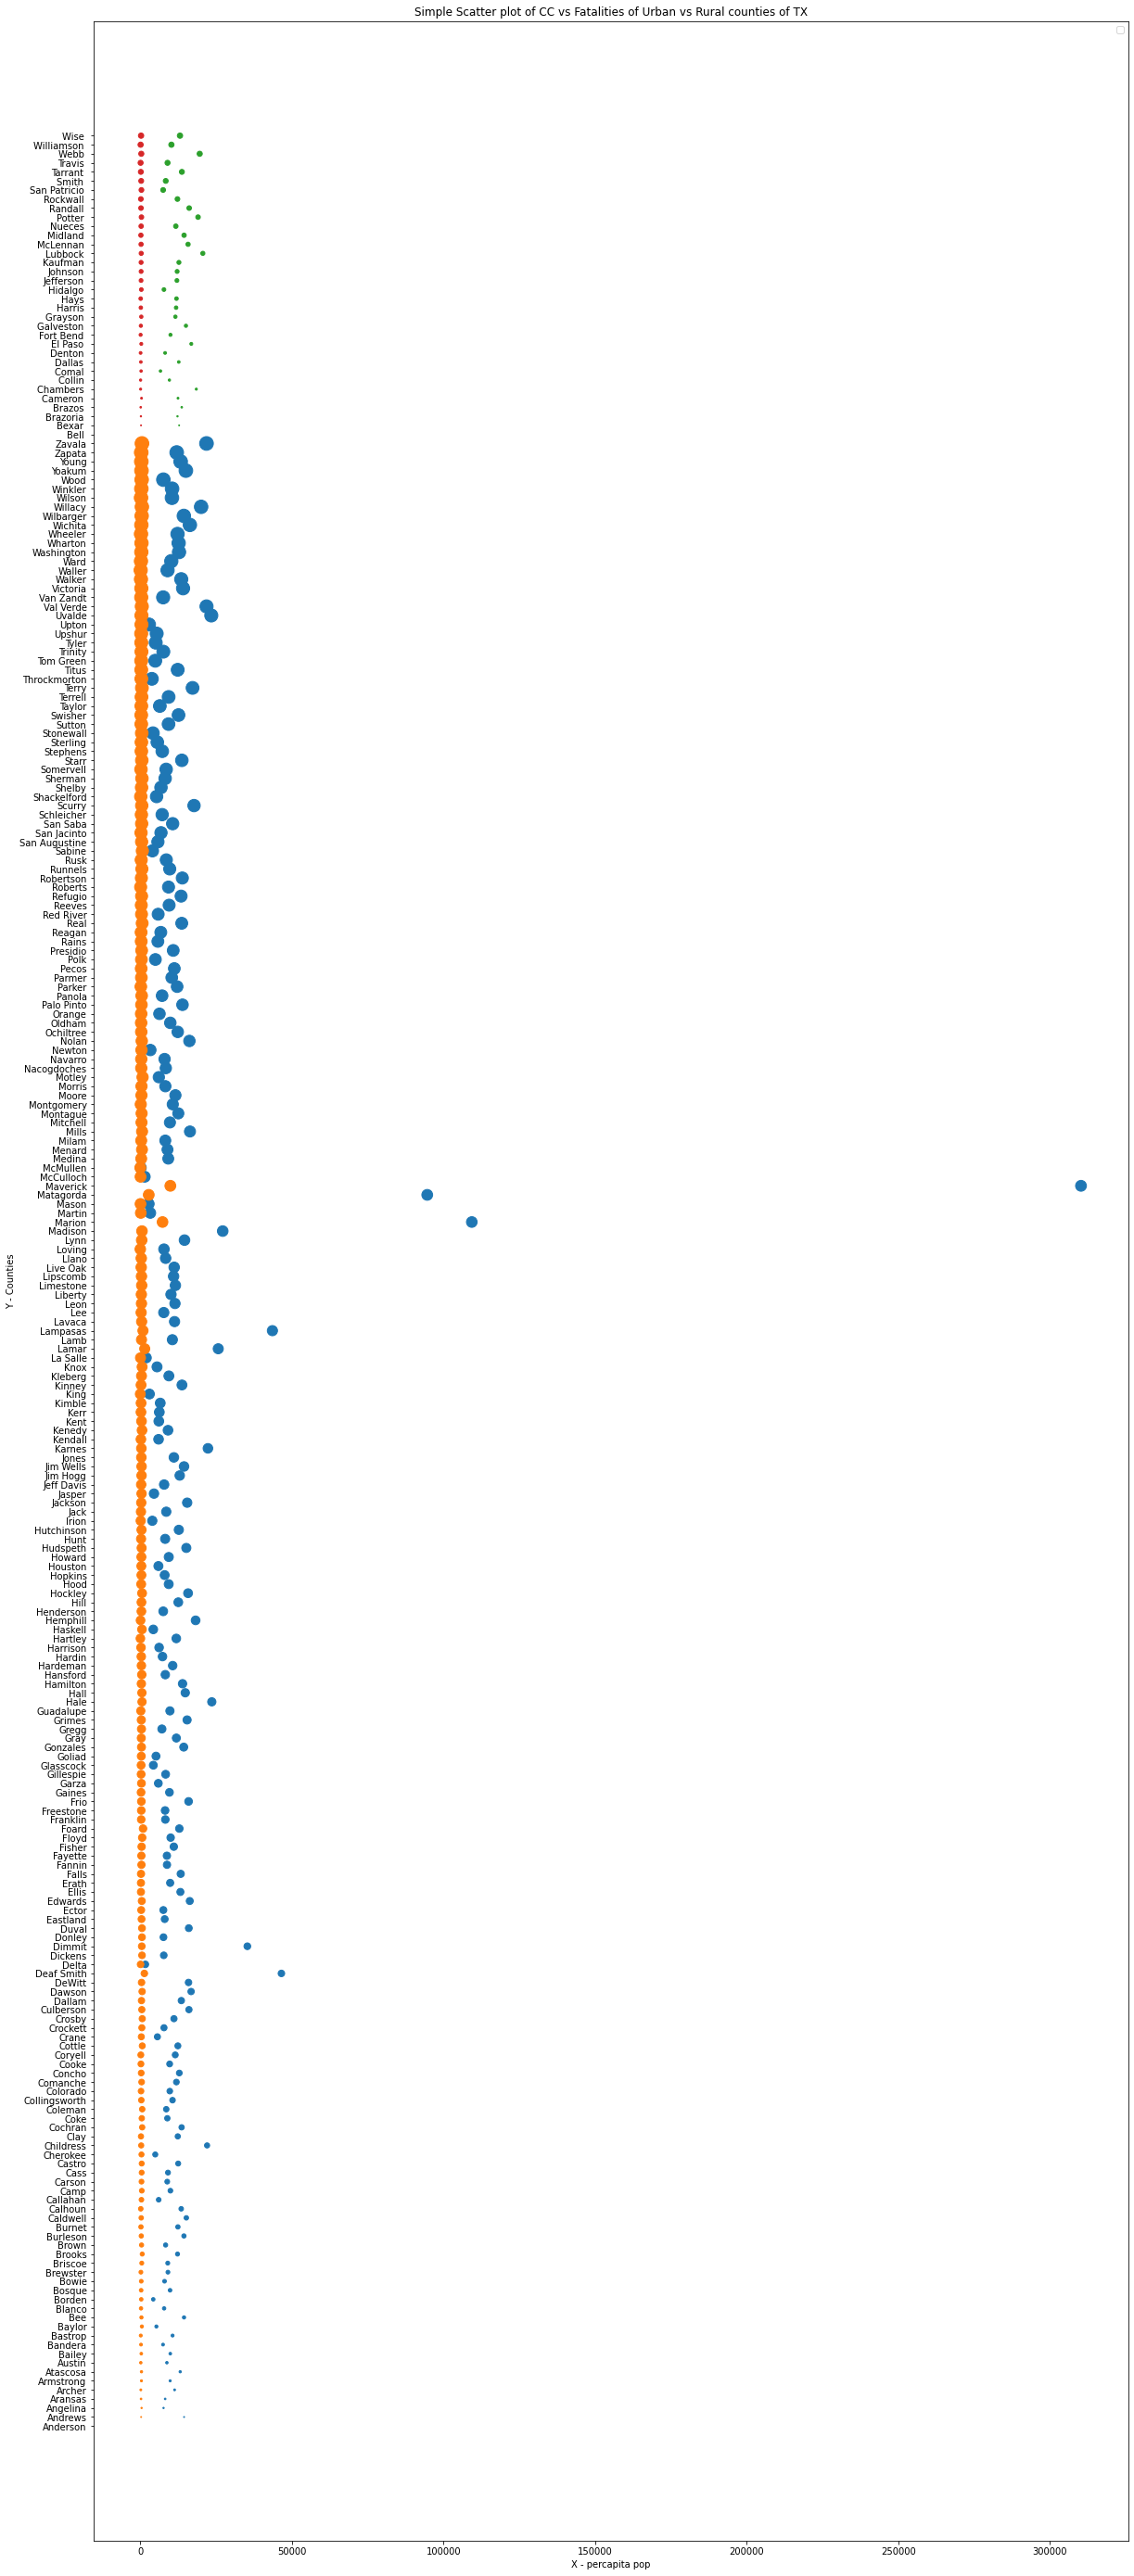

<Figure size 432x288 with 0 Axes>

In [92]:
fig = plt.figure(figsize=(20,50))
ax = fig.figure
us = [n for n in range(len(rdf['Confirmed Cases'].values.tolist()))]
plt.scatter(rdf['Confirmed Cases'],rdf.index,s=us)
ss = [n for n in range(len(rdf['Fatalities'].values.tolist()))]
plt.scatter(rdf['Fatalities'],rdf.index,s=ss)
#Ft
rs = [n for n in range(len(udf['Confirmed Cases'].values.tolist()))]
print(ss)
plt.scatter(udf['Confirmed Cases'],udf.index,rs)
sd = [n for n in range(len(udf['Fatalities'].values.tolist()))]
plt.scatter(udf['Fatalities'],udf.index,s = sd)
plt.title('Simple Scatter plot of CC vs Fatalities of Urban vs Rural counties of TX')
plt.xlabel('X - percapita pop')
plt.ylabel('Y - Counties')
plt.legend()
plt.show()
plt.savefig('fvc.pdf')
#plt.scatter(udf['Confirmed Cases'],udf['Fatalities'],label= 'Urban Fatalities Vs CC')

In [93]:
lr = udf.corr(method='pearson', min_periods=1)
lr

,Confirmed Cases,Probable Cases,Fatalities
Confirmed Cases,1.000000,-0.540895,0.204932
Probable Cases,-0.540895,1.000000,0.128538
Fatalities,0.204932,0.128538,1.000000


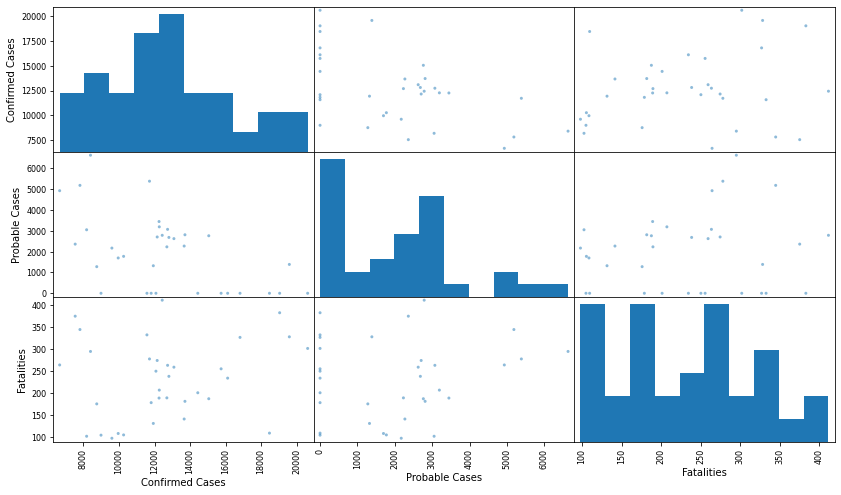

In [94]:
from pandas.plotting import scatter_matrix

scatter_matrix(udf, figsize = (14,8))
plt.show()

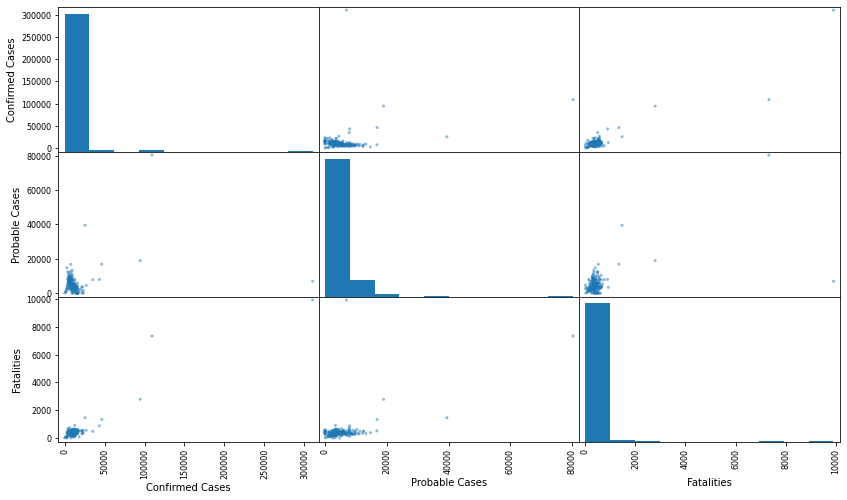

In [95]:

scatter_matrix(rdf, figsize = (14,8))
plt.show()

In [96]:
from scipy.stats import linregress

In [97]:
import scipy

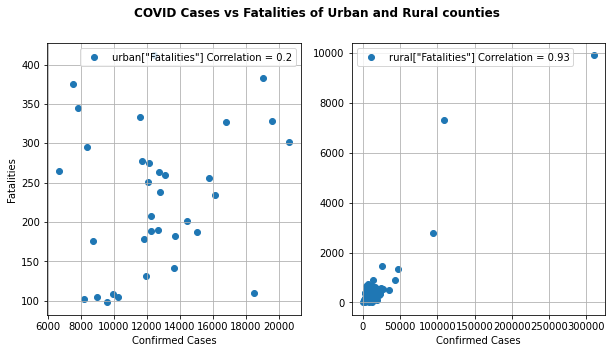

In [98]:
urban = udf
rural = rdf
#plot 1:
fig = plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)

#plt.scatter(rdf["Confirmed Cases"], rdf["Fatalities"], label=f'rdf["Fatalities"] Correlation = {np.round(np.corrcoef(rdf["Confirmed Cases"], rdf["Fatalities"])[0,1], 2)}')
plt.scatter(udf["Confirmed Cases"], udf["Fatalities"], label=f'urban["Fatalities"] Correlation = {np.round(np.corrcoef(udf["Confirmed Cases"], udf["Fatalities"])[0,1], 2)}')

plt.xlabel("Confirmed Cases")
plt.ylabel("Fatalities")
plt.legend()
plt.grid()
#plot 2:
plt.subplot(1, 2, 2)
plt.scatter(rdf["Confirmed Cases"], rdf["Fatalities"], label=f'rural["Fatalities"] Correlation = {np.round(np.corrcoef(rdf["Confirmed Cases"], rdf["Fatalities"])[0,1], 2)}')
#plt.scatter(udf["Confirmed Cases"], udf["Fatalities"], label=f'udf["Fatalities"] Correlation = {np.round(np.corrcoef(udf["Confirmed Cases"], udf["Fatalities"])[0,1], 2)}')
plt.legend()
plt.xlabel("Confirmed Cases")
#plt.ylabel("Calorie Burnage")
plt.grid()
#fig.tight_layout()
fig.suptitle('COVID Cases vs Fatalities of Urban and Rural counties',fontweight ="bold")
#plt.savefig("TX_10_County_Covid_daily_update.png", dpi=60)

plt.show()

In [99]:
#fig = plt.figure(figsize=(10,10))

#plt.scatter(rdf["Confirmed Cases"], rdf["Fatalities"], label=f'rdf["Fatalities"] Correlation = {np.round(np.corrcoef(rdf["Confirmed Cases"], rdf["Fatalities"])[0,1], 2)}')
#plt.scatter(udf["Confirmed Cases"], udf["Fatalities"], label=f'udf["Fatalities"] Correlation = {np.round(np.corrcoef(udf["Confirmed Cases"], udf["Fatalities"])[0,1], 2)}')
#plt.grid()
#plt.scatter(x, y2, label=f'y2 Correlation = {np.round(np.corrcoef(x,y2)[0,1], 2)}')
#plt.scatter(x, y3, label=f'y3 Correlation = {np.round(np.corrcoef(x,y3)[0,1], 2)}')
#plt.scatter(x, y3, label=f'y3 Correlation = {np.round(np.corrcoef(x,y3)[0,1], 2)}')
#plt.show()

In [100]:
#udf.hist()

In [101]:
#rdf.hist()

In [110]:
from scipy.stats import wilcoxon,kruskal,friedmanchisquare,f_oneway,ttest_ind,chisquare
#F, p = f_oneway(ps['A'],ps['B'],ps['C'],ps['D'])
#s,p = f_oneway(udf['Fatalities'],rdf['Fatalities'])
s,p = f_oneway(udd['Population'],udf['Fatalities'])
s,p
alpha = 0.05
if p < alpha:
	print('Different distributions (reject H0)')
else:
	print('Same distributions (fail to reject H0, so H0 is accepted)')
s,p 

(17.080394466747677, 0.00010317321968493753)

In [113]:
from scipy.stats import wilcoxon,kruskal,friedmanchisquare,f_oneway,ttest_ind,chisquare
#F, p = f_oneway(ps['A'],ps['B'],ps['C'],ps['D'])
#s,p = f_oneway(udf['Fatalities'],rdf['Fatalities'])
s,p = f_oneway(rdd['Population'],rdf['Fatalities'])
s,p
alpha = 0.05
if p < alpha:
	print('Different distributions (reject H0)')
else:
	print('Same distributions (fail to reject H0, so H0 is accepted)')
s,p 

Different distributions (reject H0)


(63.7244561827059, 1.268912549655039e-14)

In [103]:
from scipy.stats import wilcoxon,kruskal,friedmanchisquare,f_oneway,ttest_ind,chisquare
#F, p = f_oneway(ps['A'],ps['B'],ps['C'],ps['D'])
#s,p = f_oneway(udf['Fatalities'],rdf['Fatalities'])
s,p = f_oneway(rdf['Fatalities'],udf['Fatalities'])
s,p

(2.5888609933000555, 0.10886971142085014)

In [104]:
alpha = 0.05
if p < alpha:
	print('Different distributions (reject H0)')
else:
	print('Same distributions (fail to reject H0, so H0 is accepted)')
s,p 

Same distributions (fail to reject H0, so H0 is accepted)


(2.5888609933000555, 0.10886971142085014)

In [105]:
s,p = ttest_ind(udf['Fatalities'],rdf['Fatalities'])
s,p

(-1.6089937828655687, 0.10886971142084823)

In [106]:
s,p = ttest_ind(udf['Confirmed Cases'],rdf['Confirmed Cases'])
s,p

(-0.07952580176268997, 0.9366775250818382)

In [107]:
s,p = ttest_ind(udf['Confirmed Cases'],udf['Fatalities'])
s,p

(20.33851447883351, 3.9440615451361135e-30)

In [108]:
s,p = ttest_ind(rdf['Confirmed Cases'],rdf['Fatalities'])
s,p

(8.146703674503872, 3.944893229893534e-15)